# NEURO-105: Statistics and Probability using Python
## Lesson 1 - Friday 16/1/26

**Instructor:** Alexandros Pittis  
**Course:** MSc in Neurosciences, University of Crete

---

## Part 1: Jupyter Notebook Basics

A Jupyter notebook consists of **cells**:
- **Markdown cells**: Text and explanations (like this one)
- **Code cells**: Python code (executable)

### Essential Shortcuts

| Action | Shortcut |
|--------|----------|
| Run cell | `Shift + Enter` |
| Run cell, stay in place | `Ctrl + Enter` |
| Insert cell below | `B` (command mode) |
| Insert cell above | `A` (command mode) |
| Delete cell | `DD` (command mode) |
| Switch to Markdown | `M` (command mode) |
| Switch to Code | `Y` (command mode) |

**Command mode** = Press `Esc` (blue border)  
**Edit mode** = Press `Enter` (green border)

👉 **Try it:** Run the cell below with `Shift + Enter`

In [1]:
print("Hello, NEURO-105!")


Hello, NEURO-105!


In [8]:
a = 12
b = 3
c = 'giorgos'

In [13]:
print(c)

giorgos


---
## Part 2: Python Basics

In [2]:
# Variables - storing values
x = 10
y = 3.14
name = "neuroscience"

print(x)
print(y)
print(name)

10
3.14
neuroscience


In [3]:
# Simple math
a = 5
b = 1

print(a + b)   # addition
print(a - b)   # subtraction
print(a * b)   # multiplication
print(a / b)   # division
print(a ** 2)  # power

6
4
5
5.0
25


In [4]:
# Lists - collections of values
numbers = [10, 20, 30, 40, 50]

In [5]:
texts = ['a', 'b', 'c', 'd']

In [6]:
len('411')

3

In [7]:
print(numbers)
print(numbers[0])   # first element (index starts at 0)
print(numbers[-1])  # last element
print(len(numbers)) # length

[10, 20, 30, 40, 50]
10
50
5


In [8]:
# Simple loop
for n in numbers:
    print(n)
    

10
20
30
40
50


In [9]:
lista = [23, 'gh', [1,2,3]]

In [10]:
range?

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     

---
## Part 3: Import Libraries

Libraries give us extra tools. We need:
- **numpy**: Numbers and random data
- **seaborn**: Plotting
- **scipy.stats**: Statistical distributions

In [11]:
import numpy as np
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

print("Libraries loaded!")

Libraries loaded!


---
## Part 4: Random Numbers and Plotting

Let's generate random data and visualize it.

In [12]:
# Generate 1000 random numbers from a Normal distribution
# Normal distribution has: mean (center) and std (spread)

data = np.random.normal(loc=0, scale=1, size=1000)
# Basic statistics
print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Std:", np.std(data))
print("Min:", np.min(data))
print("Max:", np.max(data))

Mean: 0.04397315965610047
Median: 0.034303244097574195
Std: 1.0168859887125712
Min: -2.8711349757460214
Max: 3.288767310869768


In [13]:
np.random.normal?

Signature: np.random.normal(loc=0.0, scale=1.0, size=None)
Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

.. note::
    New code should use the `~numpy.random.Generator.normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width")

In [14]:
print(data[:10])  # show first 10 values

[-1.08653243  1.3249097   1.23692494  1.34164038 -0.87178368 -2.64586666
 -0.28209881  0.62398698  1.01328918  0.23496568]


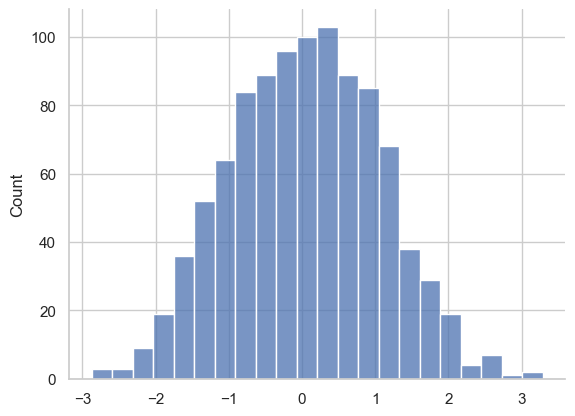

In [15]:
# Plot a histogram
sns.histplot(data)
sns.despine()

In [16]:
# Basic statistics
print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Std:", np.std(data))
print("Min:", np.min(data))
print("Max:", np.max(data))

Mean: 0.04397315965610047
Median: 0.034303244097574195
Std: 1.0168859887125712
Min: -2.8711349757460214
Max: 3.288767310869768


---
## Part 5: Different Distributions

### Normal Distribution (Gaussian)
The famous "bell curve". Most natural measurements follow this.

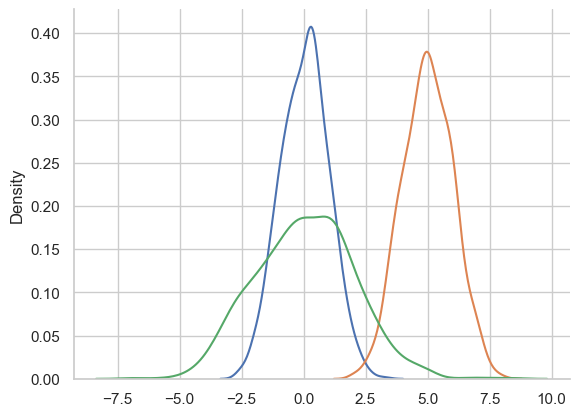

In [17]:
# Normal distribution with different parameters
normal_1 = np.random.normal(loc=0, scale=1, size=1000)    # mean=0, std=1
normal_2 = np.random.normal(loc=5, scale=1, size=1000)    # mean=5, std=1
normal_3 = np.random.normal(loc=0, scale=2, size=1000)    # mean=0, std=2

sns.kdeplot(normal_1, label="mean=0, std=1")
sns.kdeplot(normal_2, label="mean=5, std=1")
sns.kdeplot(normal_3, label="mean=0, std=2")
sns.despine()

In [18]:
sns.kdeplot?

Signature:
sns.kdeplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    fill=None,
    multiple='layer',
    common_norm=True,
    common_grid=False,
    cumulative=False,
    bw_method='scott',
    bw_adjust=1,
    warn_singular=True,
    log_scale=None,
    levels=10,
    thresh=0.05,
    gridsize=200,
    cut=3,
    clip=None,
    legend=True,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate distributions using kernel density estimation.

A kernel density estimate (KDE) plot is a method for visualizing the
distribution of observations in a dataset, analogous to a histogram. KDE
represents the data using a continuous probability density curve in one or
more dimensions.

The approach is explained further in the :ref:`user guide <tutorial_kde>`.

Relative to a histogram, KDE can produce a plot that is less cl

### Uniform Distribution
All values equally likely between min and max.

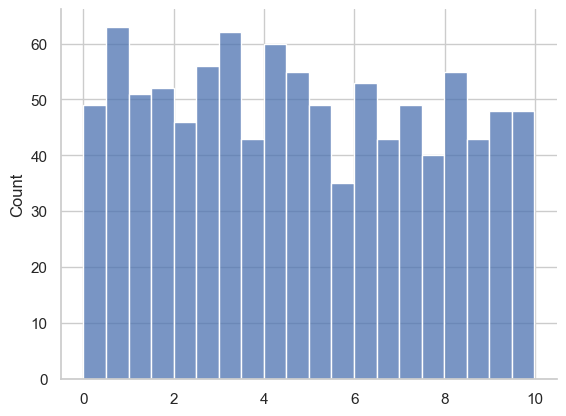

In [19]:
# Uniform distribution: random numbers between 0 and 10
uniform_data = np.random.uniform(low=0, high=10, size=1000)

sns.histplot(uniform_data, bins=20)
sns.despine()

### Binomial Distribution
Number of successes in n trials (like coin flips).

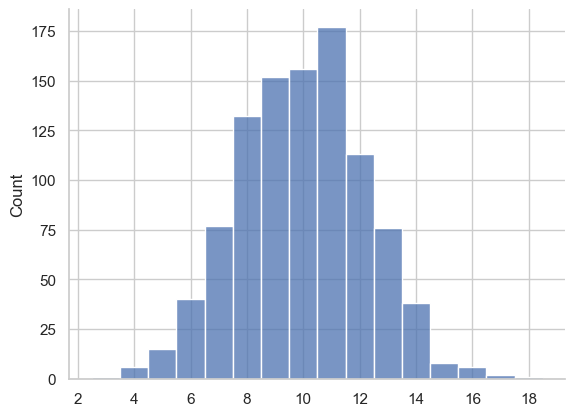

In [20]:
# Binomial: flip a coin 20 times, count heads
# n=20 flips, p=0.5 probability of heads
binomial_data = np.random.binomial(n=20, p=0.5, size=1000)

sns.histplot(binomial_data, discrete=True)
sns.despine()

### Poisson Distribution
Number of events in a fixed interval (e.g., mutations per gene).

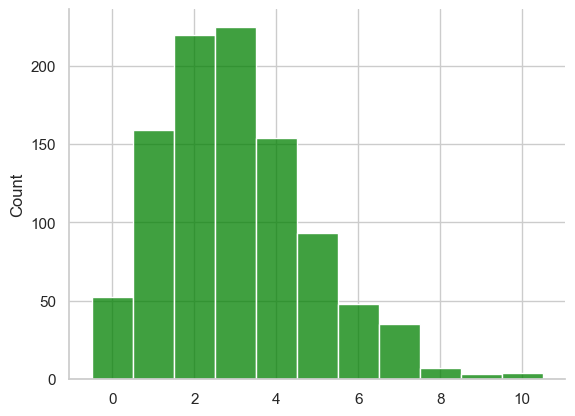

In [21]:
# Poisson: average of 3 events per interval
poisson_data = np.random.poisson(lam=3, size=1000)

sns.histplot(poisson_data, discrete=True, color="green")
sns.despine()

### Compare Distributions

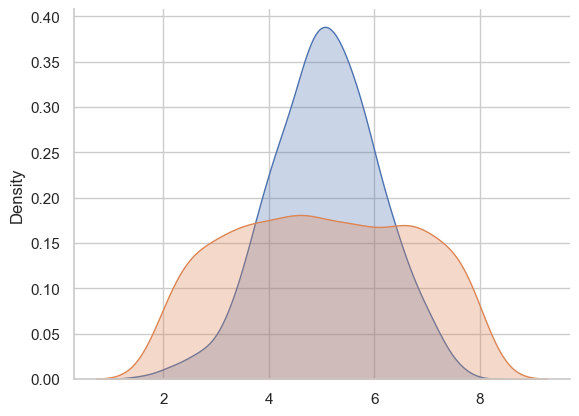

In [22]:
# Compare Normal vs Uniform
normal = np.random.normal(5, 1, 1000)
uniform = np.random.uniform(2, 8, 1000)

sns.kdeplot(normal, label="Normal", fill=True, alpha=0.3)
sns.kdeplot(uniform, label="Uniform", fill=True, alpha=0.3)
sns.despine()

---
## Part 6: Introduction to Pandas

Pandas lets us work with tables (like Excel). A table is called a **DataFrame**.

In [113]:
import pandas as pd

In [ ]:
# Create a simple table manually
patients = pd.DataFrame({
    'name': ['Anna', 'Bob', 'Clara', 'David', 'Eva'],
    'age': [25, 32, 28, 45, 38],
    'weight': [62, 78, 55, 82, 68],
    'group': ['Control', 'Treatment', 'Control', 'Treatment', 'Control']
})

patients

In [ ]:
# Access a column
patients['age']

In [ ]:
# Calculate statistics on a column
print("Mean age:", patients['age'].mean())
print("Median age:", patients['age'].median())
print("Std age:", patients['age'].std())

In [ ]:
# Quick summary of all numeric columns
patients.describe()

In [ ]:
# Filter rows: only Control group
# Filtering via the use of boolean vectors (True/False)
# Let's first see how to construct a boolean vector based on a condition
patients['group'] == 'Control'

In [ ]:
# We may use this True/False vector to keep only True lines (0, 2, 4)
patients[patients['group'] == 'Control']

---
## Part 7: Plotting with Pandas Data

Let's create a larger dataset and visualize it.

In [ ]:
# Create a larger dataset
np.random.seed(42)  # for reproducibility

experiment = pd.DataFrame({
    'subject': range(1, 31),
    'group': ['Control'] * 15 + ['Treatment'] * 15,
    'score': np.concatenate([
        np.random.normal(50, 10, 15),   # Control: mean=50
        np.random.normal(60, 10, 15)    # Treatment: mean=60
    ])
})

experiment.head(10)

In [ ]:
# Histogram of all scores
sns.histplot(data=experiment, x='score')
sns.despine()

In [ ]:
# Histogram by group
sns.histplot(data=experiment, x='score', hue='group')
sns.despine()

In [ ]:
# Box plot - compare groups
sns.boxplot(data=experiment, x='group', y='score')
sns.despine()

In [ ]:
# Violin plot
sns.violinplot(data=experiment, x='group', y='score')
sns.despine()

In [ ]:
# Statistics by group
experiment.groupby('group')['score'].mean()

In [ ]:
# More detailed statistics by group
experiment.groupby('group')['score'].describe()

---
## Part 8: Summary

- How to use Jupyter notebooks
- Basic Python: variables, lists, loops
- Generate random data from distributions (Normal, Uniform, Binomial, Poisson)
- Plot with seaborn: `histplot`, `kdeplot`, `boxplot`, `violinplot`
- Work with tables using pandas
- Calculate mean, median, std

---
## Exercises

### Exercise 1
Generate 500 random numbers from a Normal distribution with mean=100 and std=15. Plot a histogram.

In [ ]:
# YOUR CODE HERE


### Exercise 2
Using the `experiment` DataFrame, find the mean score for the Control group only.

In [ ]:
# YOUR CODE HERE


### Exercise 3
Create your own small DataFrame with 5 people: name, height (in cm), and city. Then calculate the mean height.

In [ ]:
# YOUR CODE HERE


---
## Resources

- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
- [Pandas Getting Started](https://pandas.pydata.org/docs/getting_started/index.html)
- [NumPy for Beginners](https://numpy.org/doc/stable/user/absolute_beginners.html)

---

**Next class (23/1/26):** Fitting models to data, correlation

---
*NEURO-105 - MSc in Neurosciences, University of Crete*